**Mielage Prediction - Regression Analysis**

The objective is to predict car mileage (MPG) based on various car attributes using regression analysis, and evaluate the model's performance to ensure accurate predictions. This involves preprocessing the data, building a regression model, and assessing its accuracy.

To load the "Auto MPG" dataset from the YBI Foundation's GitHub repository into Google Colab, you can use the raw URL of the dataset file.

**Import** **Library**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Import** **Data**

In [8]:
df=pd.read_csv("MPG.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


**Describe Data**

In [11]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [13]:
df.shape

(398, 9)

In [10]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

**Data Visualization**

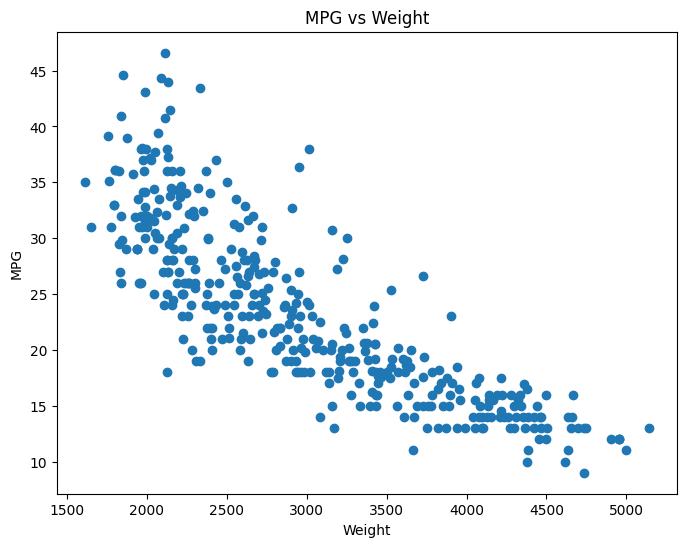

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(df['weight'], df['mpg'])
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('MPG vs Weight')
plt.show()

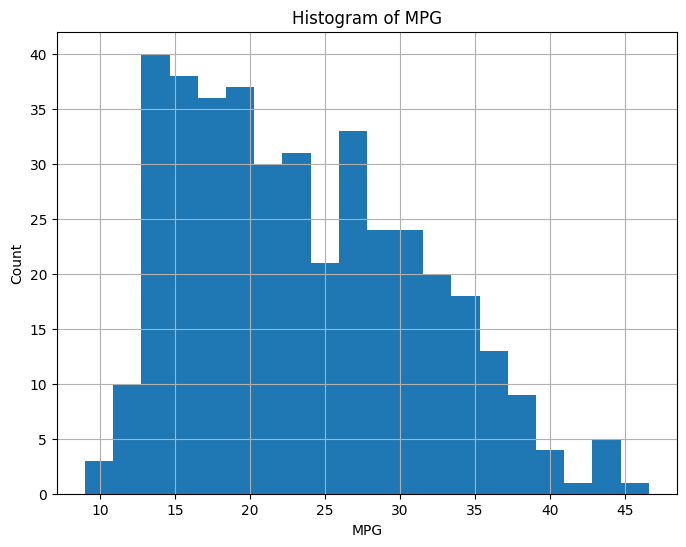

In [18]:
plt.figure(figsize=(8,6))
df['mpg'].hist(bins=20)
plt.xlabel('MPG')
plt.ylabel('Count')
plt.title('Histogram of MPG')
plt.show()

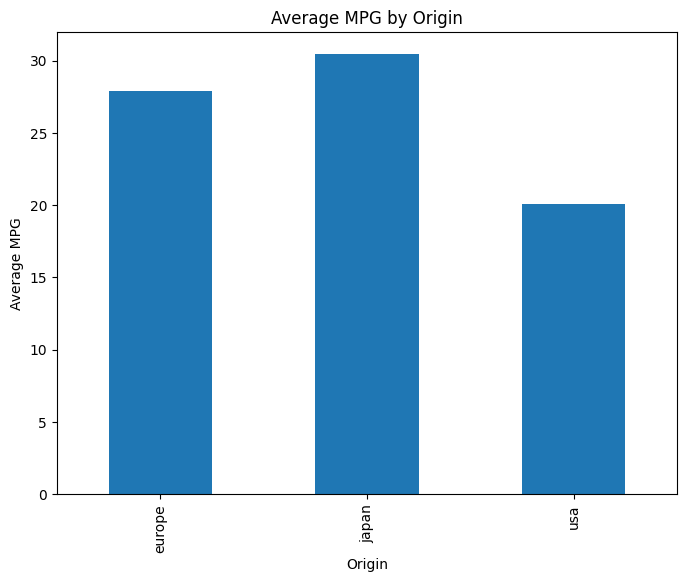

In [19]:
plt.figure(figsize=(8,6))
df.groupby('origin')['mpg'].mean().plot(kind='bar')
plt.xlabel('Origin')
plt.ylabel('Average MPG')
plt.title('Average MPG by Origin')
plt.show()

<Figure size 800x600 with 0 Axes>

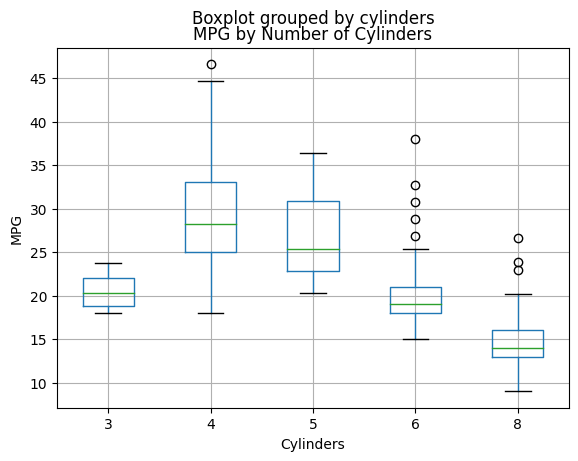

In [20]:
plt.figure(figsize=(8,6))
df.boxplot(column='mpg', by='cylinders')
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.title('MPG by Number of Cylinders')
plt.show()

<Figure size 1200x1200 with 0 Axes>

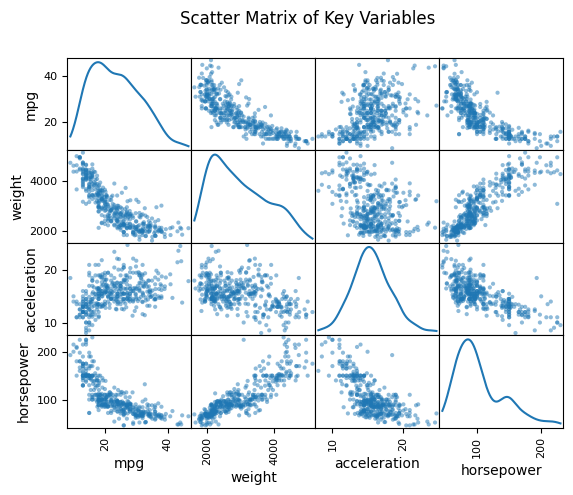

In [21]:
plt.figure(figsize=(12,12))
pd.plotting.scatter_matrix(df[['mpg', 'weight', 'acceleration', 'horsepower']],
                           diagonal='kde')
plt.suptitle('Scatter Matrix of Key Variables')
plt.show()

**Data Preprocessing**

In [33]:
df['horsepower'] = df['horsepower'].replace('?', None).astype(float)
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)
df.drop(columns='origin', inplace=True)

**Define Target Variable (y) and Feature Variables (X)**

In [38]:
X = df.drop(columns='mpg')
y = df['mpg']

**Train Test Split**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Modeling**

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Model Evaluation**

In [41]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 9.441014238263561
R-squared Score: 0.824406942699022


**Prediction**

In [44]:
new_data = [[8, 307.0, 130.0, 3504.0, 12.0, 70]]
new_prediction = model.predict(new_data)
print(f'Predicted MPG: {new_prediction[0]}')

Predicted MPG: 15.09790362760792


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Explaination**

1.Model Training: The 'LinearRegression' model is trained using the 'fit' method on the training data ('X_train' and 'y_train').

2.Model Prediction: For new input data, such as '[[8, 307.0, 130.0, 3504.0, 12.0, 70]]', the 'predict' method is used to estimate the target variable, which in this case is the Miles Per Gallon (MPG).

3.Output: The predicted MPG value is printed, which provides an estimate of fuel efficiency based on the input features.